In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('/content/train.csv')

In [13]:
train_df.sample(7)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
482466,1002231,P00217542,M,51-55,11,B,1,1,1,2.0,11.0,11829
380816,1004549,P00214642,F,0-17,10,C,1,0,11,13.0,16.0,7448
87171,1001447,P00206342,M,18-25,4,A,0,0,5,8.0,NaN,5271
299279,1004059,P00084942,M,26-35,14,C,1,1,5,8.0,NaN,1802
60598,1003370,P00005042,M,18-25,4,C,1,0,6,16.0,NaN,20515
336267,1003777,P00338442,M,18-25,4,B,0,0,1,16.0,NaN,11522
154882,1005939,P00113042,F,46-50,15,C,1,1,11,16.0,NaN,5901


In [4]:
train_df.shape

(550068, 12)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# **Univariate Analysis**

1 - 75% of the customer are **MALE** & rest are **FEMALE**.

2 - Dataset contains 40% data of customer with age 26 - 35.

In [7]:
plt.rcParams["figure.figsize"] = (12,9)

In [8]:
train_df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7f2c7e90de90>,
 [Text(-0.785367774085001, 0.7701931312526561, ''),
  Text(0.7853677019743126, -0.7701932047840901, '')],
 [Text(-0.42838242222818235, 0.42010534431963054, '75.31%'),
  Text(0.42838238289507957, -0.42010538442768547, '24.69%')])

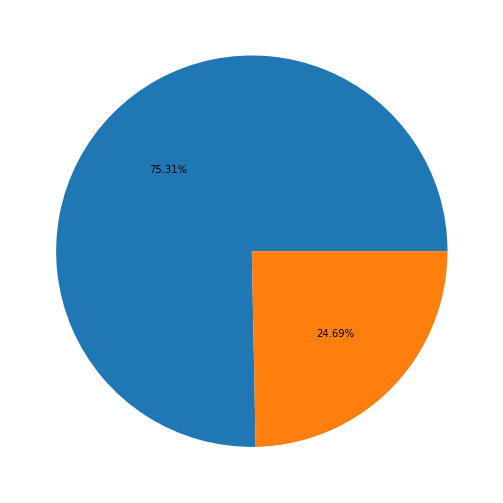

In [9]:
plt.pie(train_df['Gender'].value_counts(), autopct='%1.2f%%')

In [10]:
train_df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

([<matplotlib.patches.Wedge at 0x7f2c7d845110>,
 [Text(0.34254781550769436, 1.0453042590991901, '26-35'),
  Text(-1.0999860751865844, 0.005534834741354073, '36-45'),
  Text(-0.406302589631829, -1.0222124073099825, '18-25'),
  Text(0.48031423239356413, -0.9895949869316142, '46-50'),
  Text(0.8836014705420766, -0.655170543641791, '51-55'),
  Text(1.0523803112495336, -0.32014946586607823, '55+'),
  Text(1.0959108835259952, -0.09475935504884372, '0-17')],
 [Text(0.1868442630041969, 0.5701659595086491, '39.92%'),
  Text(-0.5999924046472278, 0.0030190007680113125, '20.00%'),
  Text(-0.221619594344634, -0.5575704039872632, '18.12%'),
  Text(0.2619895813055804, -0.5397790837808804, '8.31%'),
  Text(0.48196443847749626, -0.3573657510773405, '7.00%'),
  Text(0.5740256243179273, -0.17462698138149718, '3.91%'),
  Text(0.597769572832361, -0.05168692093573293, '2.75%')])

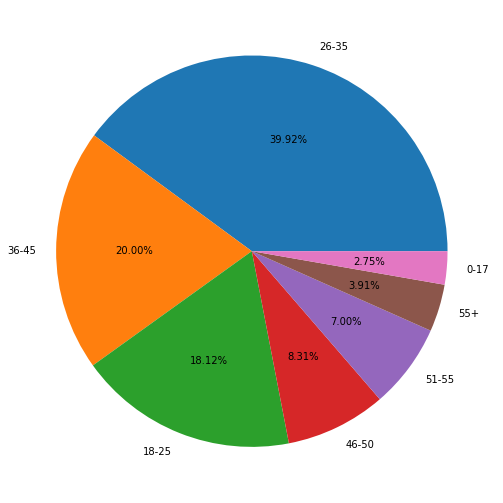

In [12]:
plt.pie(train_df['Age'].value_counts().values, labels=train_df['Age'].value_counts().index, autopct='%1.2f%%')

In [21]:
train_df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


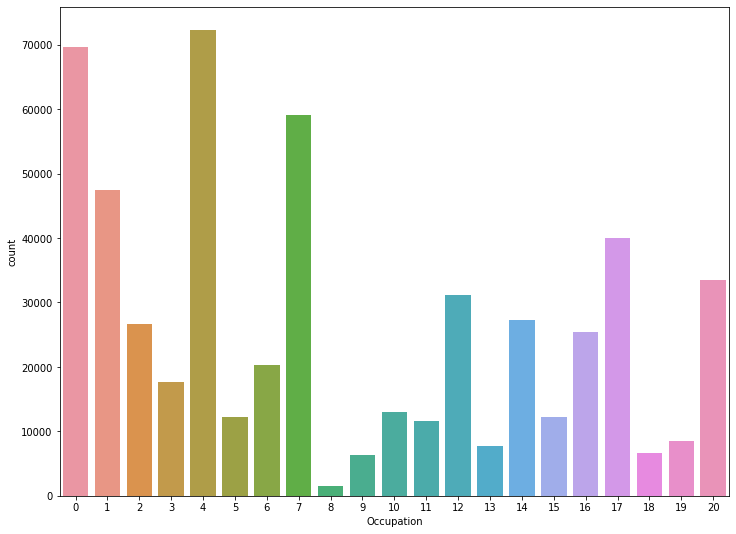

In [18]:
sns.countplot(train_df['Occupation'])

In [22]:
train_df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

([<matplotlib.patches.Wedge at 0x7f2c7d4bf6d0>,
 [Text(0.27267989579948126, 1.0656667745720443, 'B'),
  Text(-0.9774040218269879, -0.5046596656326213, 'C'),
  Text(0.7311976184733743, -0.8217968378734892, 'A')],
 [Text(0.14873448861789884, 0.5812727861302059, '42.03%'),
  Text(-0.5331294664510843, -0.27526890852688435, '31.12%'),
  Text(0.3988350646218405, -0.4482528206582668, '26.85%')])

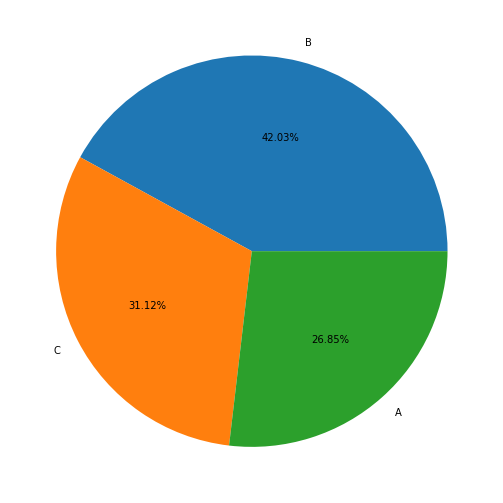

In [23]:
plt.pie(train_df['City_Category'].value_counts().values, labels=train_df['City_Category'].value_counts().index, autopct='%1.2f%%')

In [24]:
train_df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [25]:
train_df['Stay_In_Current_City_Years'] = train_df['Stay_In_Current_City_Years'].astype('category')

([<matplotlib.patches.Wedge at 0x7f2c7d3ee510>,
 [Text(0.4921146236045687, 0.983780055314466, '1'),
  Text(-1.0347973749789408, 0.37308764752628026, '2'),
  Text(-0.7821676107334653, -0.7734428412749725, '3'),
  Text(0.2583588870847174, -1.0692290145073442, '4+'),
  Text(1.002184351502242, -0.4534606108627638, '0')],
 [Text(0.2684261583297647, 0.5366073028987995, '35.24%'),
  Text(-0.5644349318066949, 0.20350235319615284, '18.51%'),
  Text(-0.4266368785818901, -0.42187791342271225, '17.32%'),
  Text(0.14092302931893672, -0.583215826094915, '15.40%'),
  Text(0.5466460099103138, -0.24734215137968932, '13.53%')])

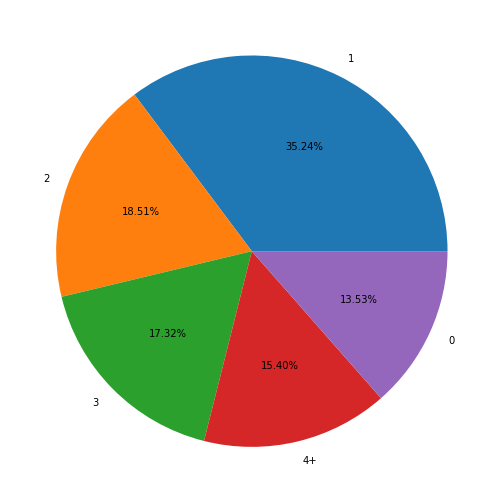

In [27]:
plt.pie(train_df['Stay_In_Current_City_Years'].value_counts().values, labels=train_df['Stay_In_Current_City_Years'].value_counts().index, autopct='%1.2f%%')

In [28]:
train_df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

([<matplotlib.patches.Wedge at 0x7f2c7d341d10>,
 [Text(-0.3080415398264776, 1.0559878833307383, '0'),
  Text(0.30804144095775543, -1.055987912171664, '1')],
 [Text(-0.16802265808716957, 0.5759933909076753, '59.03%'),
  Text(0.16802260415877565, -0.5759934066390894, '40.97%')])

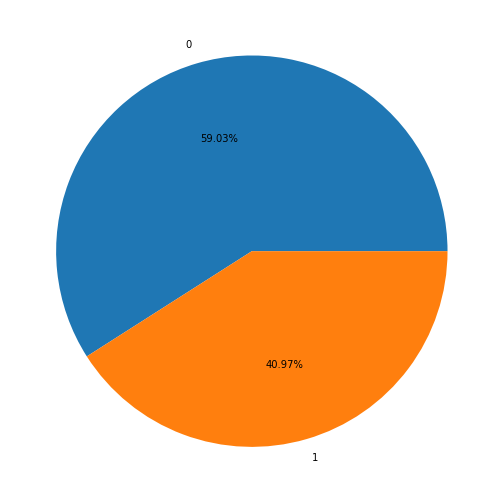

In [30]:
plt.pie(train_df['Marital_Status'].value_counts().values, labels=train_df['Marital_Status'].value_counts().index, autopct='%1.2f%%')

In [31]:
train_df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


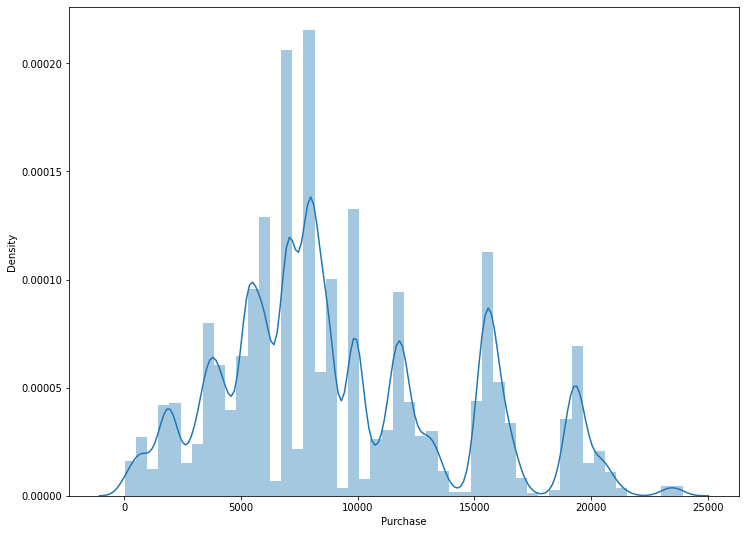

In [37]:
sns.distplot(train_df['Purchase'])

# **Multivariate Analysis**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


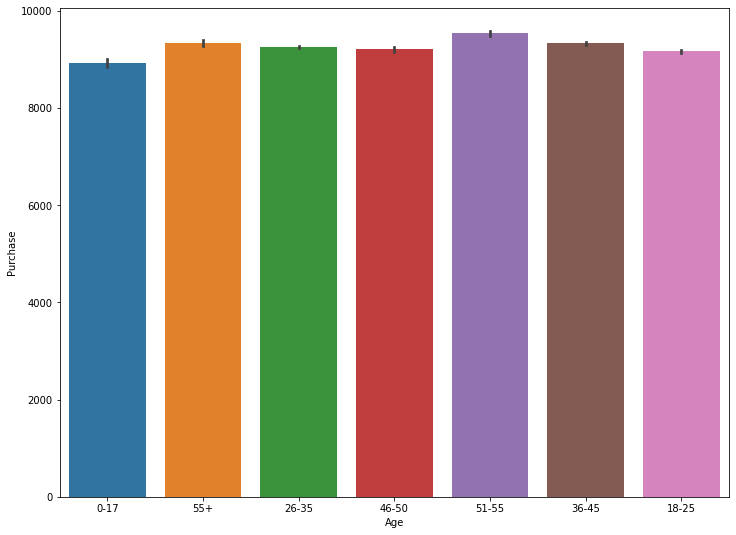

In [39]:
sns.barplot(train_df['Age'], train_df['Purchase'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


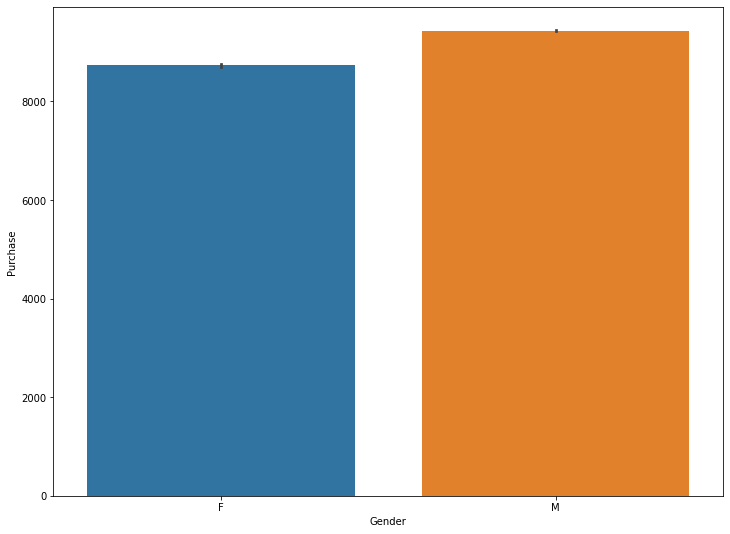

In [40]:
sns.barplot(train_df['Gender'], train_df['Purchase'])